In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
import calendar
import datetime

In [2]:
# Base style for graph markers etc.
base_style_fossil = dict(
    color="Red",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=6,
    markerfacecolor="White",
    markeredgewidth=1,
    markeredgecolor="Red",
    alpha=0.5,
)

base_style_renewable = dict(
    color="Green",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=6,
    markerfacecolor="White",
    markeredgewidth=1,
    markeredgecolor="Green",
    alpha=0.5,
)

base_style_wind = dict(
    color="Blue",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=6,
    markerfacecolor="White",
    markeredgewidth=1,
    markeredgecolor="Blue",
    alpha=0.5,
)

base_style_solar = dict(
    color="Orange",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=6,
    markerfacecolor="White",
    markeredgewidth=1,
    markeredgecolor="Orange",
    alpha=0.5,
)

In [3]:
# File path for carbon intensity dataset
PATH = "C:/Users/Krist/OneDrive/Documents/Data Analysis/Practice/Carbon/data/processed/df_carbon.parquet"

# Keeps the DATETIME column as an index
df_carbon = pd.read_parquet(PATH)

In [4]:
df_carbon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148042 entries, 2009-01-01 00:00:00+00:00 to 2025-11-21 09:00:00+00:00
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FOSSIL            148042 non-null  float64
 1   COAL              148042 non-null  float64
 2   GAS               148042 non-null  float64
 3   NUCLEAR           148042 non-null  float64
 4   STORAGE           148042 non-null  float64
 5   GENERATION        148042 non-null  float64
 6   WIND              148042 non-null  float64
 7   HYDRO             148042 non-null  float64
 8   SOLAR             148042 non-null  float64
 9   BIOMASS           148042 non-null  float64
 10  RENEWABLE         148042 non-null  float64
 11  OTHER             148042 non-null  float64
 12  CARBON_INTENSITY  148042 non-null  float64
 13  LOW_CARBON        148042 non-null  float64
 14  ZERO_CARBON       148042 non-null  float64
dtypes: float64(15)
memory 

# Correlation Matrix

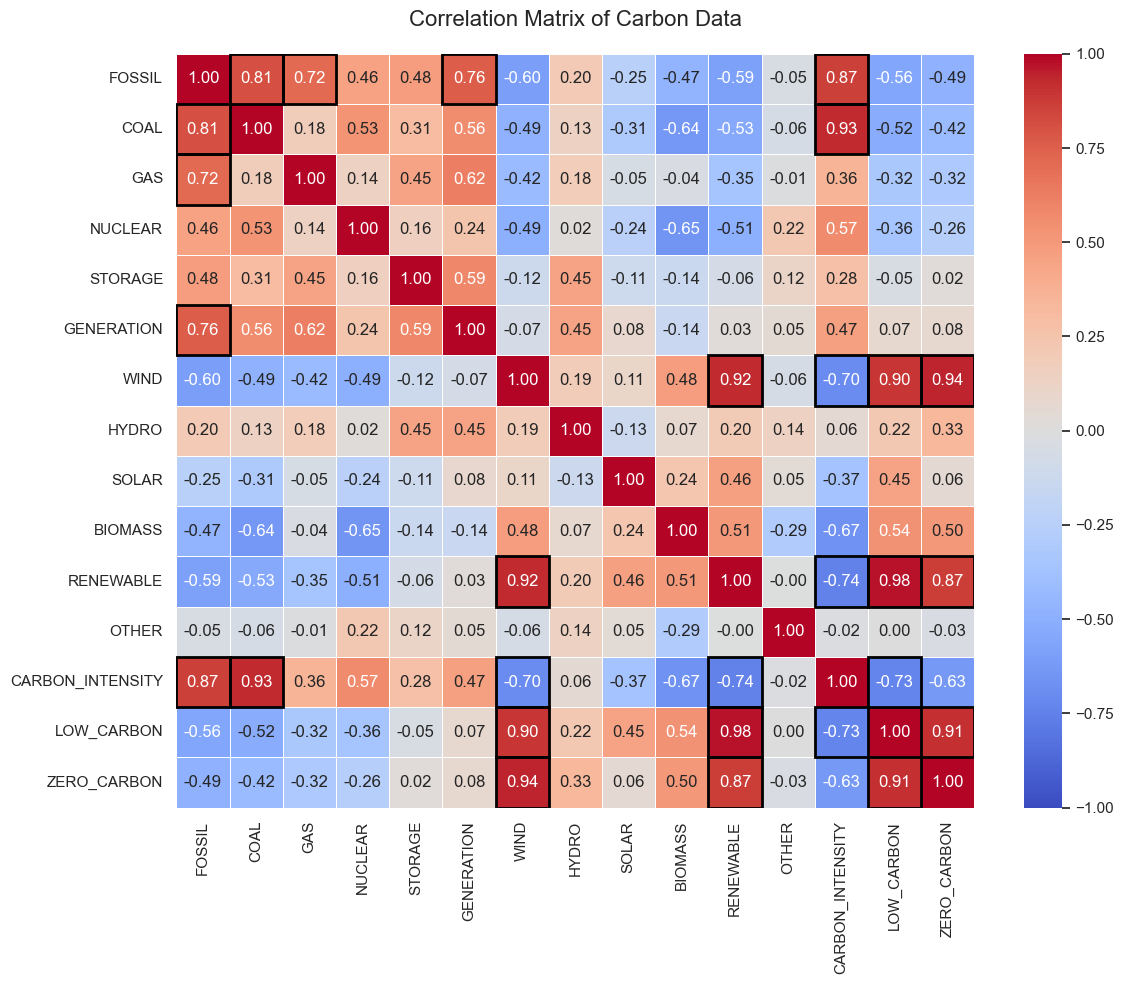

In [5]:
# Create a correlation matrix for df_carbon
correlation_matrix = df_carbon.corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
ax = sns.heatmap(
    correlation_matrix, 
    annot=True,              # Show correlation values
    cmap='coolwarm',         # Color map (red for negative, blue for positive)
    vmin=-1, vmax=1,         # Set limits for correlation values
    linewidths=0.5,          # Add lines between cells
    fmt='.2f'                # Format correlation values to 2 decimal places
)

# Add black borders for correlations > 0.7
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7 and i != j: 
            ax.add_patch(plt.Rectangle(
                (j, i), 1, 1,
                fill=False,
                edgecolor='black',
                lw=2,
                zorder=10
            ))

# Add title
plt.title('Correlation Matrix of Carbon Data', fontsize=16, pad=20)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

# Carbon Intensity EDA

<Axes: xlabel='DATETIME'>

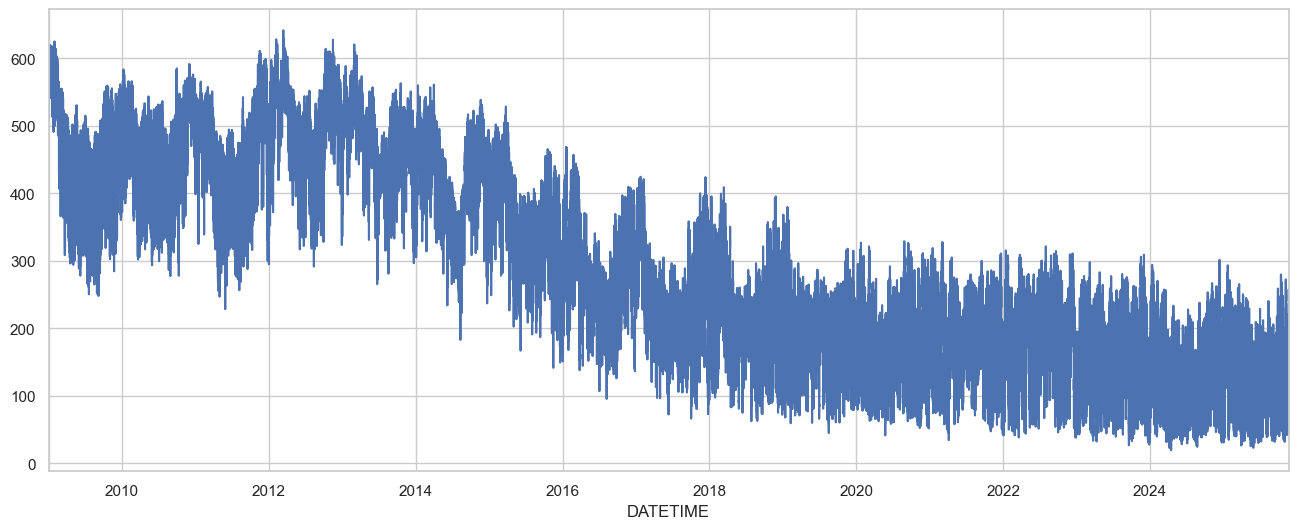

In [6]:
df_carbon['CARBON_INTENSITY'].plot(figsize=(16, 6))

In [7]:
df_carbon['CARBON_INTENSITY'].diff().abs().describe()

count    148041.000000
mean          8.492323
std           8.631501
min           0.000000
25%           2.500000
50%           6.000000
75%          11.500000
max          81.500000
Name: CARBON_INTENSITY, dtype: float64

In [8]:
df_carbon['CARBON_INTENSITY'].describe()

count    148042.000000
mean        292.820149
std         148.998796
min          19.500000
25%         172.000000
50%         259.000000
75%         432.500000
max         641.500000
Name: CARBON_INTENSITY, dtype: float64

In [9]:
(df_carbon['CARBON_INTENSITY'].diff() == 0).rolling(48).sum().max()

8.0

# Time-Series Plots

C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\1627121706.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_groups = df_carbon.groupby(df_carbon.index.to_period('M'))


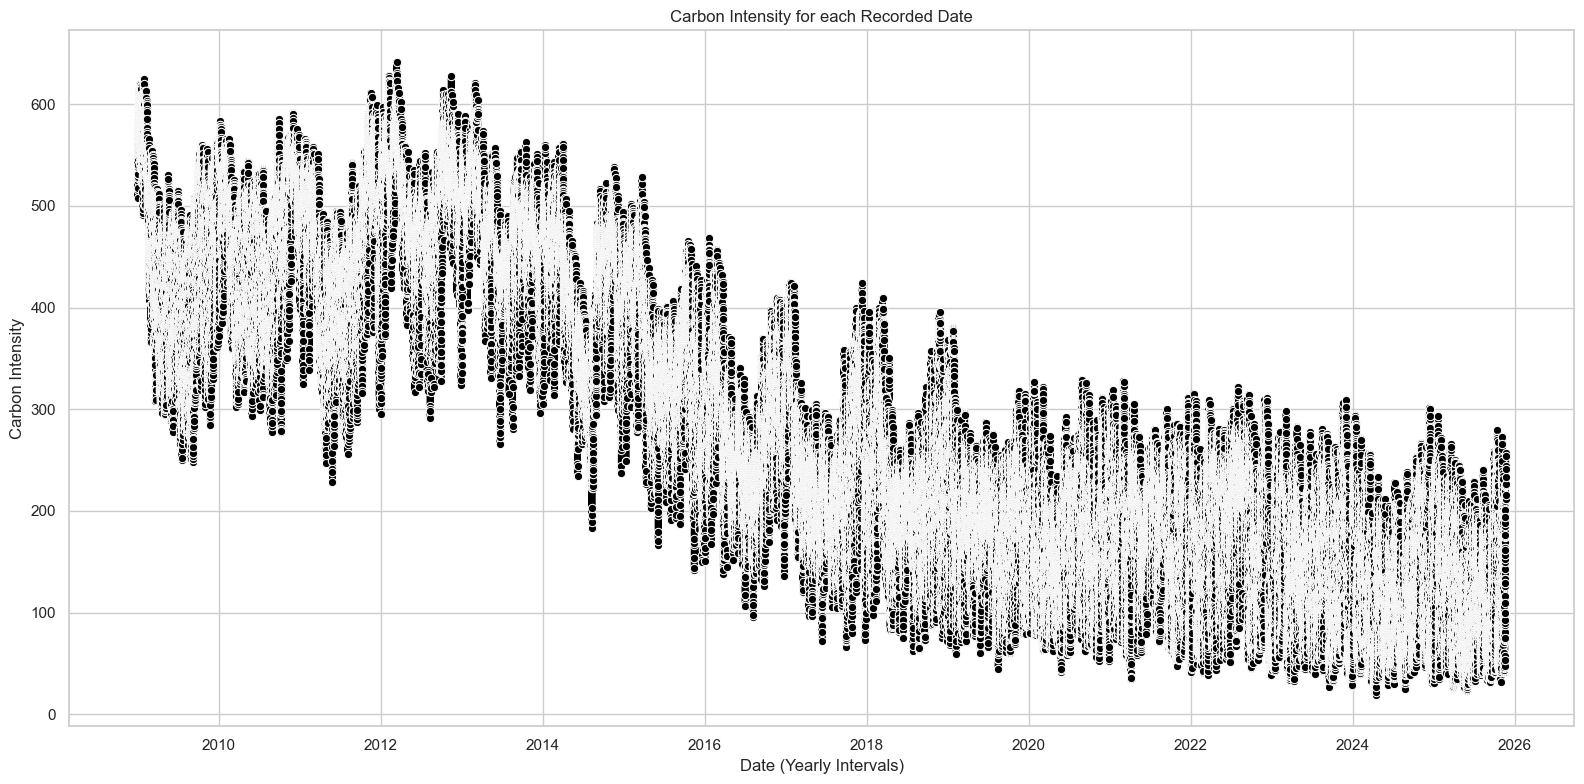

In [10]:
# Full Dataframe with all of the data included - Slow Load
plt.figure(figsize=(16, 8))

sns.lineplot(
    x=df_carbon.index,
    y=df_carbon["CARBON_INTENSITY"],
    color="black",
    linewidth=5,
    zorder=3,
    marker="o",
    markersize=6,
    markerfacecolor="black",
)

plt.title("Carbon Intensity for each Recorded Date")
plt.xlabel("Date (Yearly Intervals)")
plt.ylabel("Carbon Intensity")

# Group by year-month and get the first timestamp of each month
monthly_groups = df_carbon.groupby(df_carbon.index.to_period('M'))
monthly_positions = monthly_groups.first().index.to_timestamp()

# Create labels using calendar module
monthly_labels = [
    f"{calendar.month_abbr[date.month]} {date.year}" 
    for date in monthly_positions
]

plt.grid(True)
plt.tight_layout()
plt.show()

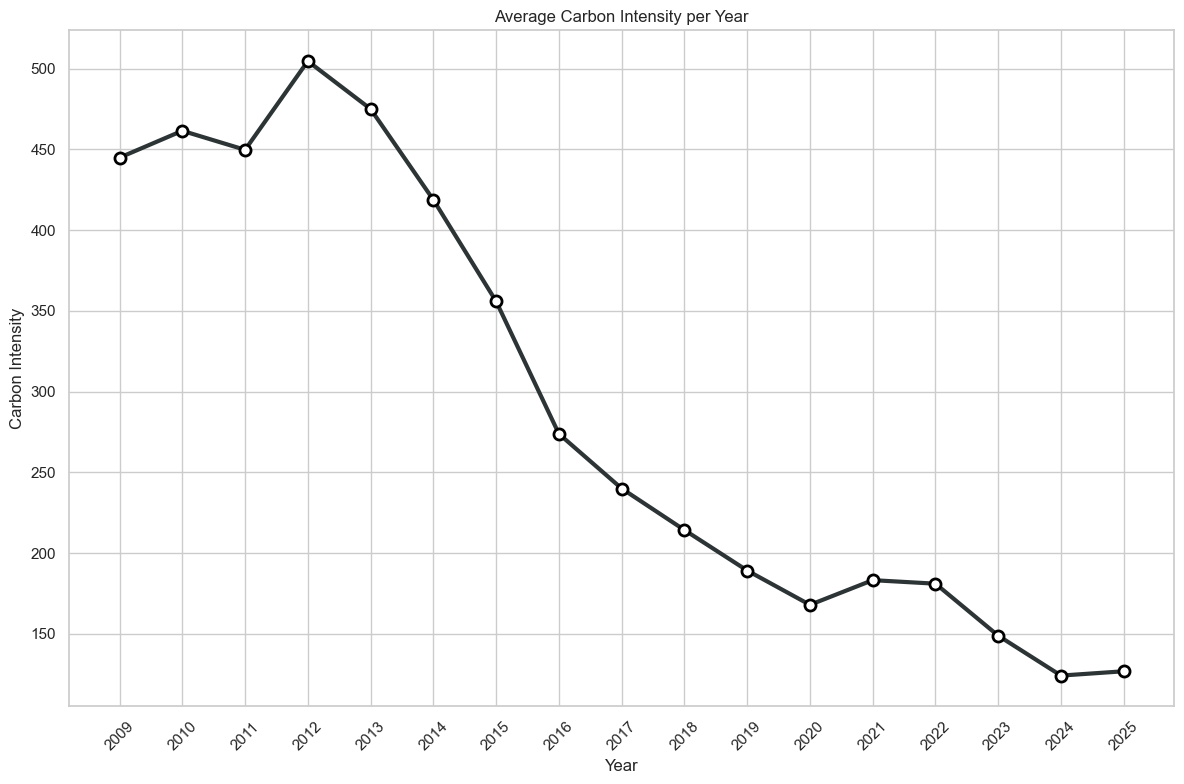

In [11]:
# Create a new DataFrame with one entry per year
yearly_data = df_carbon.groupby(df_carbon.index.year).mean()

plt.figure(figsize=(12, 8))

sns.lineplot(
    x=yearly_data.index,
    y=yearly_data["CARBON_INTENSITY"],
    color="#2d3436",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=8,
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black"
)

plt.title("Average Carbon Intensity per Year")
plt.xlabel("Year")
plt.ylabel("Carbon Intensity")

plt.xticks(yearly_data.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

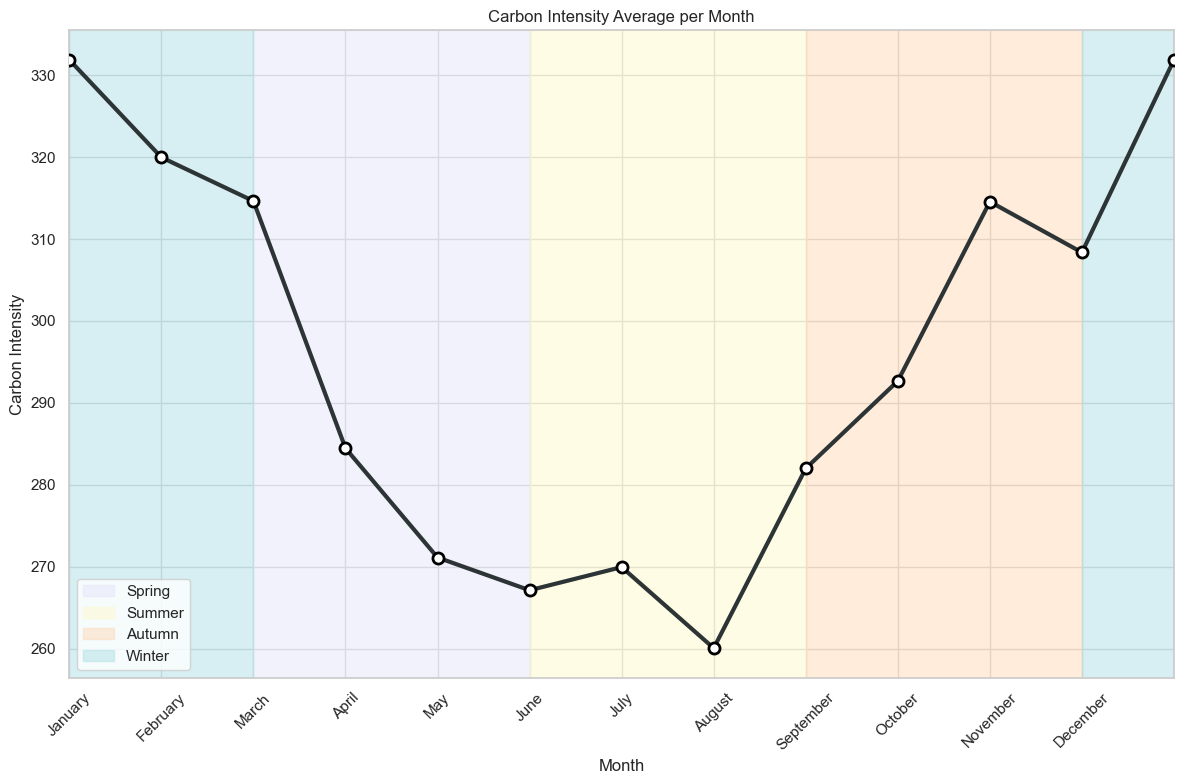

In [12]:
# Create a new DataFrame with one entry per year
monthly_data = df_carbon.groupby(df_carbon.index.month).mean()

# Step 1: Duplicate January data (index 1)
monthly_data_looped = monthly_data.copy()
january = monthly_data.loc[[1]].copy()
january.index = [13]  # Set new index to 13 (after December)

# Step 2: Append to the DataFrame
monthly_data_looped = pd.concat([monthly_data_looped, january])

# Plot with looped data
plt.figure(figsize=(12, 8))

# Background shading (same as before)
plt.axvspan(3, 6, alpha=0.5, color="#E6E6FA", label="Spring")
plt.axvspan(6, 9, alpha=0.5, color="#FFFACD", label="Summer")
plt.axvspan(9, 12, alpha=0.5, color="#FFDAB9", label="Autumn")
plt.axvspan(12, 13, alpha=0.5, color="#B0E0E6", label="Winter")  # Dec to Jan
plt.axvspan(1, 3, alpha=0.5, color="#B0E0E6")  # Jan to Mar

# Line plot
sns.lineplot(
    x=monthly_data_looped.index, y=monthly_data_looped["CARBON_INTENSITY"], color="#2d3436",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=8,
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black")

# Set custom x-ticks (last one is blank)
month_labels = [calendar.month_name[m] for m in monthly_data.index] + [""]
xticks = list(monthly_data_looped.index)
plt.xticks(xticks, month_labels, rotation=45)

# Set tight x-limits to eliminate white space
plt.xlim(1, 13)

# Labels and formatting
plt.title("Carbon Intensity Average per Month")
plt.xlabel("Month")
plt.ylabel("Carbon Intensity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Average per Day

In [13]:
df_carbon["DAY_OF_WEEK"] = df_carbon.index.map(
    lambda x: calendar.day_name[x.weekday()]
)

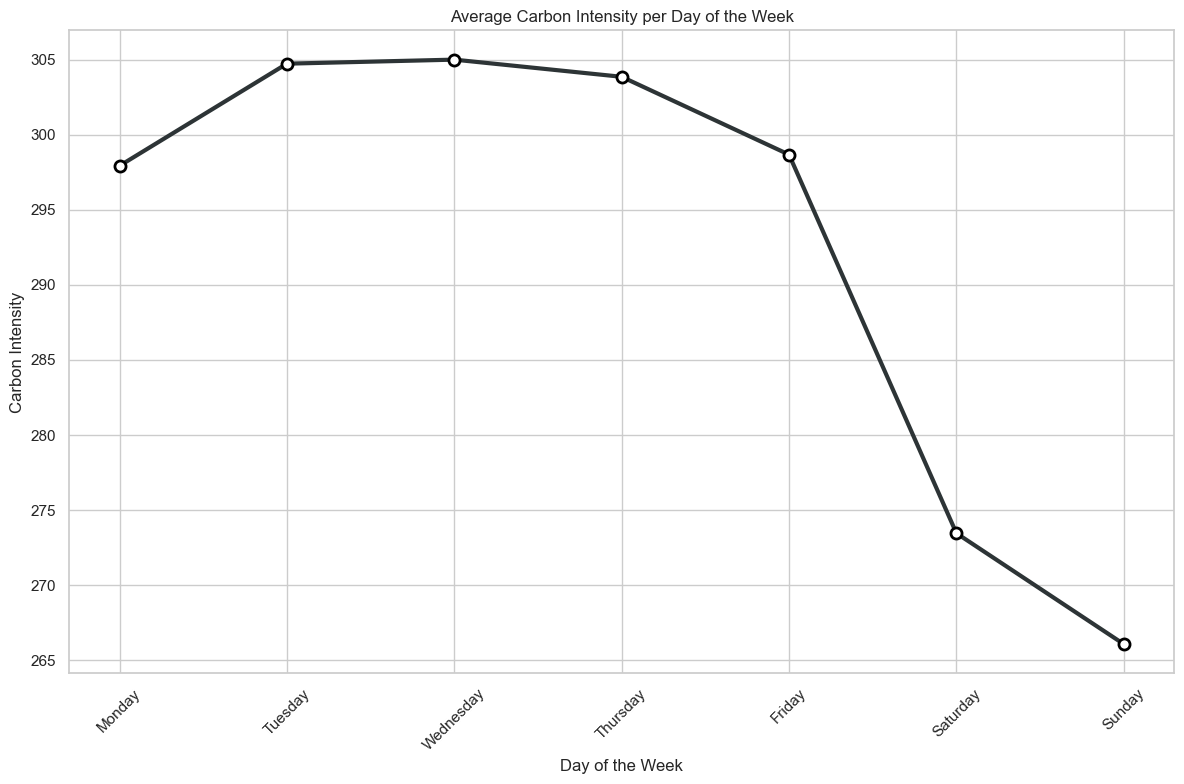

In [14]:
# Correct order
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Create a new DataFrame with one entry per day
daily_data = df_carbon.groupby(df_carbon["DAY_OF_WEEK"]).mean()
daily_data = daily_data.reindex(day_order)

plt.figure(figsize=(12, 8))
sns.lineplot(x=daily_data.index, y=daily_data["CARBON_INTENSITY"],
    color="#2d3436",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=8,
    markerfacecolor="white",
    markeredgewidth=2,
    markeredgecolor="black")

# Add labels and title for clarity
plt.title("Average Carbon Intensity per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Carbon Intensity")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hour of the day profile

C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\3349683633.py:210: UserWarning: Glyph 127750 (\N{CITYSCAPE AT DUSK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\

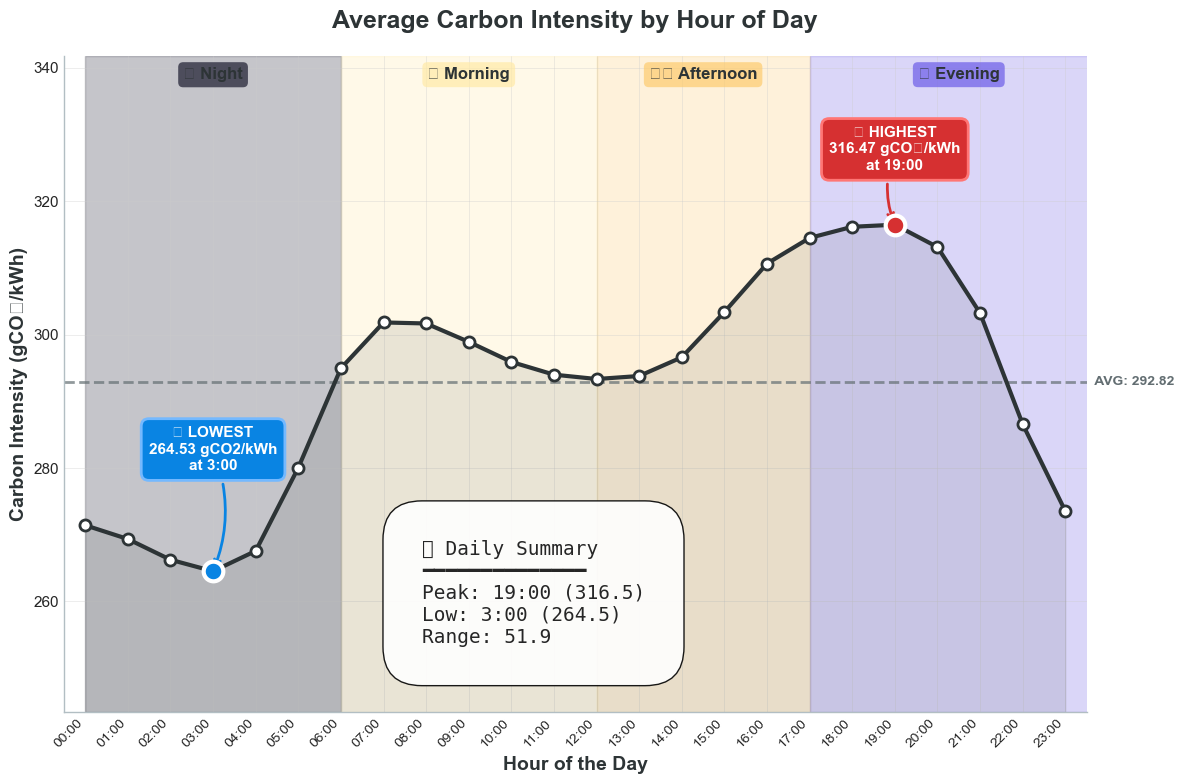

In [15]:
# Create a new DataFrame with one entry per hour
hourly_data = df_carbon.groupby(df_carbon.index.hour).mean(numeric_only=True)

# Find min and max points
min_hour = hourly_data["CARBON_INTENSITY"].idxmin()
max_hour = hourly_data["CARBON_INTENSITY"].idxmax()
min_value = hourly_data["CARBON_INTENSITY"].min()
max_value = hourly_data["CARBON_INTENSITY"].max()

# Set up the figure with a clean style
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# Define time periods with icons and enhanced colors
periods = [
    {
        "name": "Night",
        "start": 0,
        "end": 6,
        "color": "#1a1a2e",
        "icon": "🌙",
        "text_color": "white",
    },
    {
        "name": "Morning",
        "start": 6,
        "end": 12,
        "color": "#ffeaa7",
        "icon": "🌅",
        "text_color": "#2d3436",
    },
    {
        "name": "Afternoon",
        "start": 12,
        "end": 17,
        "color": "#fdcb6e",
        "icon": "☀️",
        "text_color": "#2d3436",
    },
    {
        "name": "Evening",
        "start": 17,
        "end": 24,
        "color": "#6c5ce7",
        "icon": "🌆",
        "text_color": "white",
    },
]

y_min = hourly_data["CARBON_INTENSITY"].min() * 0.92
y_max = hourly_data["CARBON_INTENSITY"].max() * 1.08

# Create gradient-like effect with multiple alpha levels
for p in periods:
    ax.axvspan(p["start"], p["end"], alpha=0.25, color=p["color"], zorder=0)
    # Add period label at the top
    mid_x = (p["start"] + p["end"]) / 2
    ax.text(
        mid_x,
        y_max * 0.995,
        f"{p['icon']} {p['name']}",
        ha="center",
        va="top",
        fontsize=12,
        fontweight="bold",
        color=p["text_color"] if p["text_color"] == "#2d3436" else "#2d3436",
        bbox=dict(
            boxstyle="round,pad=0.3", facecolor=p["color"], alpha=0.7, edgecolor="none"
        ),
    )

# Plot the main line with enhanced styling
line = ax.plot(
    hourly_data.index,
    hourly_data["CARBON_INTENSITY"],
    color="#2d3436",
    linewidth=3,
    zorder=3,
    marker="o",
    markersize=8,
    markerfacecolor="white",
    markeredgewidth=2,
)

# Fill under the curve with gradient effect
ax.fill_between(
    hourly_data.index,
    y_min,
    hourly_data["CARBON_INTENSITY"],
    alpha=0.1,
    color="#2d3436",
    zorder=1,
)

# Enhanced annotation for lowest point
ax.annotate(
    f"⬇ LOWEST\n{min_value:.2f} gCO2/kWh\nat {min_hour}:00",
    xy=(min_hour, min_value),
    xytext=(min_hour, min_value + (y_max - y_min) * 0.15),
    fontsize=11,
    fontweight="bold",
    color="white",
    ha="center",
    va="bottom",
    bbox=dict(
        boxstyle="round,pad=0.5", facecolor="#0984e3", edgecolor="#74b9ff", linewidth=2
    ),
    arrowprops=dict(
        arrowstyle="->", color="#0984e3", lw=2, connectionstyle="arc3,rad=-0.2"
    ),
)
ax.scatter(
    min_hour,
    min_value,
    color="#0984e3",
    s=200,
    zorder=5,
    edgecolor="white",
    linewidth=3,
)

# Enhanced annotation for highest point
ax.annotate(
    f"⬆ HIGHEST\n{max_value:.2f} gCO₂/kWh\nat {max_hour}:00",
    xy=(max_hour, max_value),
    xytext=(max_hour, max_value - (y_max - y_min) * -0.15),
    fontsize=11,
    fontweight="bold",
    color="white",
    ha="center",
    va="top",
    bbox=dict(
        boxstyle="round,pad=0.5", facecolor="#d63031", edgecolor="#ff7675", linewidth=2
    ),
    arrowprops=dict(
        arrowstyle="->", color="#d63031", lw=2, connectionstyle="arc3,rad=0.2"
    ),
)
ax.scatter(
    max_hour,
    max_value,
    color="#d63031",
    s=200,
    zorder=5,
    edgecolor="white",
    linewidth=3,
)

# Calculate and display statistics
avg_value = hourly_data["CARBON_INTENSITY"].mean()
ax.axhline(
    y=avg_value, color="#636e72", linestyle="--", linewidth=2, alpha=0.7, zorder=2
)
ax.text(
    23.5,
    avg_value,
    f"  AVG: {avg_value:.2f}",
    va="center",
    ha="left",
    fontsize=10,
    color="#636e72",
    fontweight="bold",
)

# Enhanced title and labels
ax.set_title(
    "Average Carbon Intensity by Hour of Day",
    fontsize=18,
    fontweight="bold",
    color="#2d3436",
    pad=20,
)
ax.set_xlabel("Hour of the Day", fontsize=14, fontweight="bold", color="#2d3436")
ax.set_ylabel(
    "Carbon Intensity (gCO₂/kWh)", fontsize=14, fontweight="bold", color="#2d3436"
)

# Custom x-axis formatting
ax.set_xticks(range(24))
ax.set_xticklabels(
    [f"{h:02d}:00" for h in range(24)], rotation=45, ha="right", fontsize=10
)
ax.set_xlim(-0.5, 23.5)
ax.set_ylim(y_min, y_max)

# Add subtle grid
ax.grid(True, alpha=0.5, linestyle="-", linewidth=0.5)
ax.set_axisbelow(True)

# Add a summary box
summary_text = f"📊 Daily Summary\n━━━━━━━━━━━━━━\nPeak: {max_hour}:00 ({max_value:.1f})\nLow: {min_hour}:00 ({min_value:.1f})\nRange: {max_value - min_value:.1f}"
ax.text(
    0.35,
    0.1,
    summary_text,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment="bottom",
    horizontalalignment="left",
    bbox=dict(boxstyle="round,pad=2", facecolor="white", edgecolor="black", alpha=0.9),
    family="monospace",
)

# Remove top and right spines for cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#b2bec3")
ax.spines["bottom"].set_color("#b2bec3")

plt.tight_layout()
plt.show()

# Seasonality Comparison

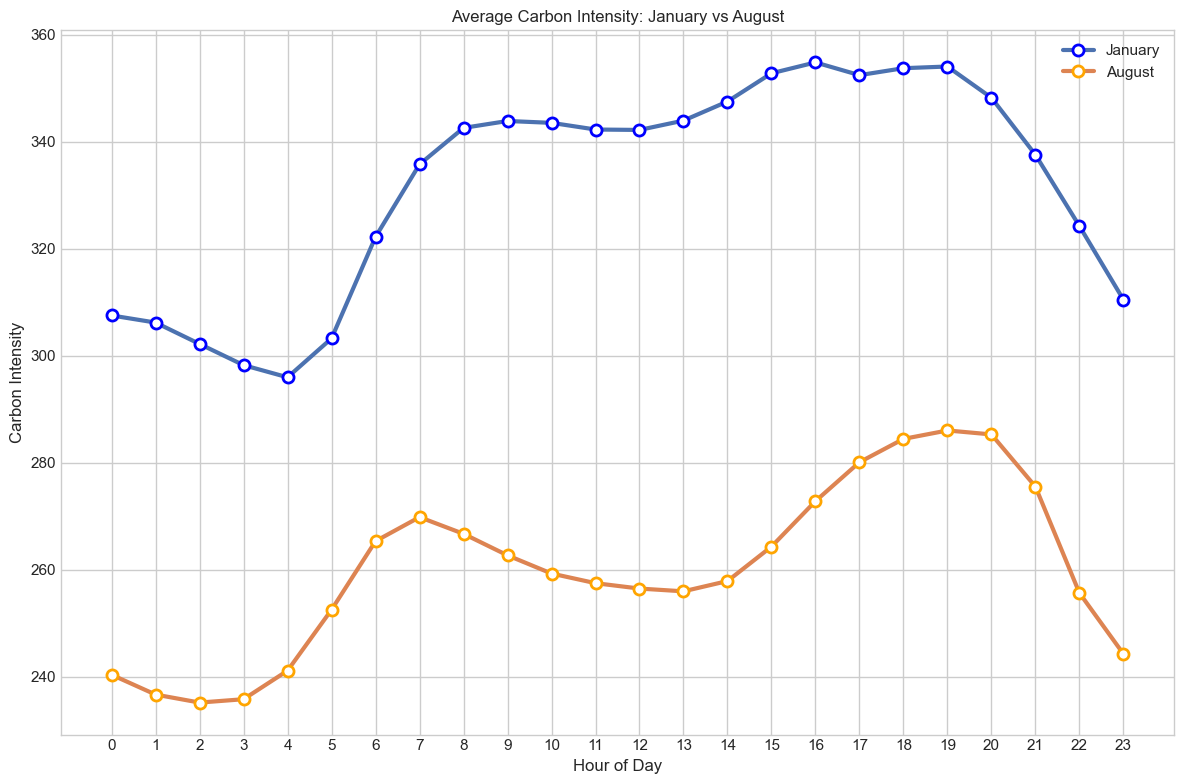

In [16]:
# Filter for January and August
jan_data = df_carbon[df_carbon.index.month == 1]
aug_data = df_carbon[df_carbon.index.month == 8]

# Group by hour of day
jan_hourly = jan_data.groupby(jan_data.index.hour)["CARBON_INTENSITY"].mean()
aug_hourly = aug_data.groupby(aug_data.index.hour)["CARBON_INTENSITY"].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x=jan_hourly.index, y=jan_hourly.values, label="January", marker="o", linewidth=3, markersize=8, markerfacecolor="white", markeredgewidth=2, markeredgecolor="Blue")
sns.lineplot(x=aug_hourly.index, y=aug_hourly.values, label="August", marker="o", linewidth=3, markersize=8, markerfacecolor="white", markeredgewidth=2, markeredgecolor="Orange")
    

plt.title("Average Carbon Intensity: January vs August")
plt.xlabel("Hour of Day")
plt.ylabel("Carbon Intensity")
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Relationship with generation mix

# Carbon Intensity

In [ ]:
# Create a figure with specified size (12 inches width, 8 inches height)
plt.figure(figsize=(12, 8))

# Create a regression plot showing relationship between coal usage and carbon intensity
# - x-axis: Coal usage values from df_carbon dataframe
# - y-axis: Carbon intensity values from df_carbon dataframe
# - scatter_kws: Makes points semi-transparent (alpha=0.3) and smaller (s=10)
# - line_kws: Sets the regression line color to red
sns.regplot(x='COAL', y='CARBON_INTENSITY', data=df_carbon, 
            scatter_kws={'alpha': 0.3, 's': 10}, 
            line_kws={'color': 'red'})

# Add a title to the plot
plt.title('Carbon Intensity vs Coal')

# Label the x-axis
plt.xlabel('Coal')

# Label the y-axis
plt.ylabel('Carbon Intensity')

# Add grid lines to the plot for better readability
plt.grid(True)

# Adjust the layout to ensure everything fits properly
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='COAL', y='LOW_CARBON', data=df_carbon, 
            scatter_kws={'alpha': 0.3, 's': 10}, 
            line_kws={'color': 'red'})
plt.title('Carbon Intensity vs Low Carbon')
plt.xlabel('Carbon')
plt.ylabel('Carbon Intensity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='COAL', y='ZERO_CARBON', data=df_carbon, 
            scatter_kws={'alpha': 0.3, 's': 10}, 
            line_kws={'color': 'red'})
plt.title('Carbon Intensity vs Zero Carbon')
plt.xlabel('Zero Carbon')
plt.ylabel('Carbon Intensity')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fossil Fuels vs Renewables

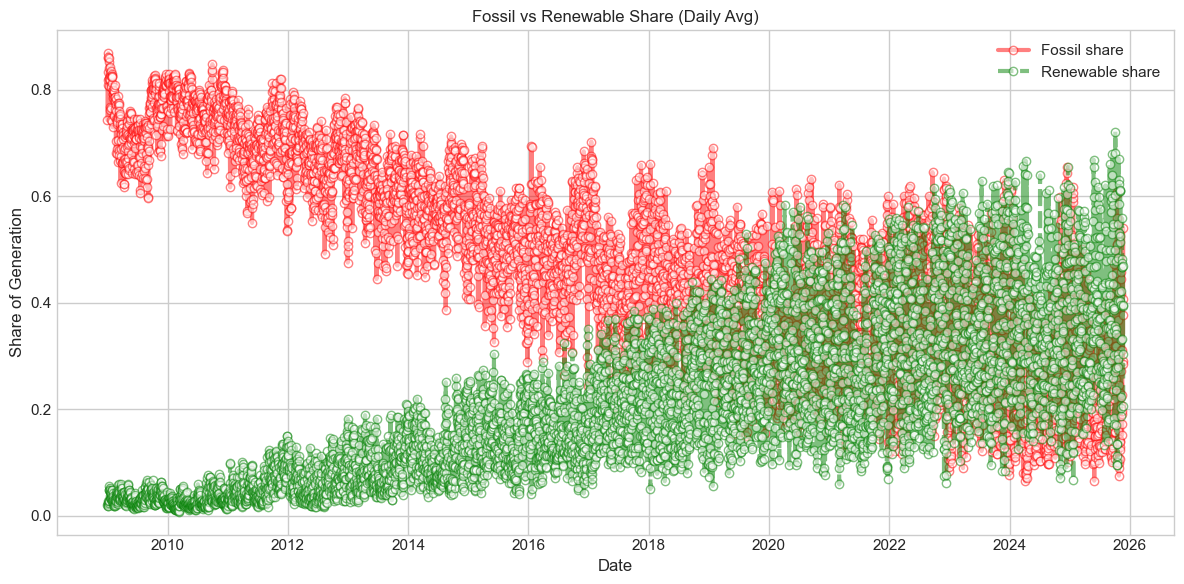

In [17]:
df_bal = df_carbon.copy()

df_bal["FOSSIL_SHARE"] = df_bal["FOSSIL"] / df_bal["GENERATION"]
df_bal["RENEWABLE_SHARE"] = df_bal["RENEWABLE"] / df_bal["GENERATION"]

# Resample only the columns needed
columns_to_resample = ["FOSSIL_SHARE", "RENEWABLE_SHARE"]
df_bal_daily = df_bal[columns_to_resample].resample("D").mean()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_bal_daily,
    x=df_bal_daily.index,
    y="FOSSIL_SHARE",
    label="Fossil share",
    **base_style_fossil
)

sns.lineplot(
    data=df_bal_daily,
    x=df_bal_daily.index,
    y="RENEWABLE_SHARE",
    label="Renewable share",
    **base_style_renewable
)

plt.title("Fossil vs Renewable Share (Daily Avg)")
plt.xlabel("Date")
plt.ylabel("Share of Generation")
plt.legend()
plt.tight_layout()
plt.show()

# Wind & Solar Volatility

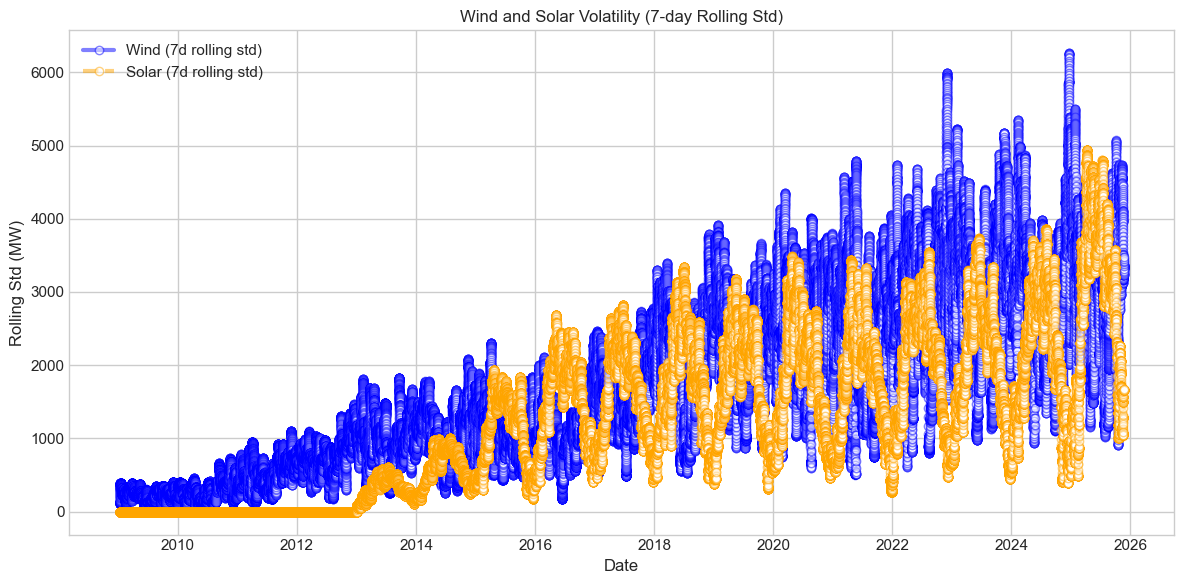

In [18]:
df_vol = df_carbon[["WIND", "SOLAR"]].copy()

# 7-day rolling standard deviation (168 hours)
window = 24 * 7
df_vol["WIND_ROLL_STD"] = df_vol["WIND"].rolling(window).std()
df_vol["SOLAR_ROLL_STD"] = df_vol["SOLAR"].rolling(window).std()

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_vol,
    x=df_vol.index,
    y="WIND_ROLL_STD",
    label="Wind (7d rolling std)",
    **base_style_wind
)

sns.lineplot(
    data=df_vol,
    x=df_vol.index,
    y="SOLAR_ROLL_STD",
    label="Solar (7d rolling std)",
    linestyle="--",
    **base_style_solar
)

plt.title("Wind and Solar Volatility (7-day Rolling Std)")
plt.xlabel("Date")
plt.ylabel("Rolling Std (MW)")
plt.legend()
plt.tight_layout()
plt.show()

# Total system generation

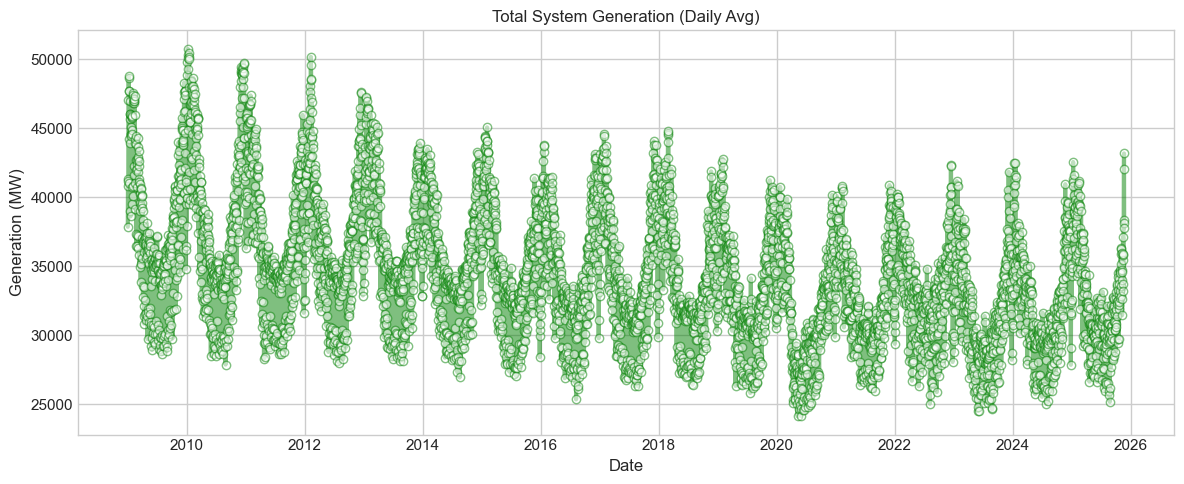

In [19]:
gen_daily = df_carbon["GENERATION"].resample("D").mean()

plt.figure(figsize=(12, 5))

sns.lineplot(
    x=gen_daily.index,
    y=gen_daily.values,
    **base_style_renewable
)

plt.title("Total System Generation (Daily Avg)")
plt.xlabel("Date")
plt.ylabel("Generation (MW)")
plt.tight_layout()
plt.show()

C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\20516561.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  gen_yearly = df_carbon["GENERATION"].resample("y").mean()


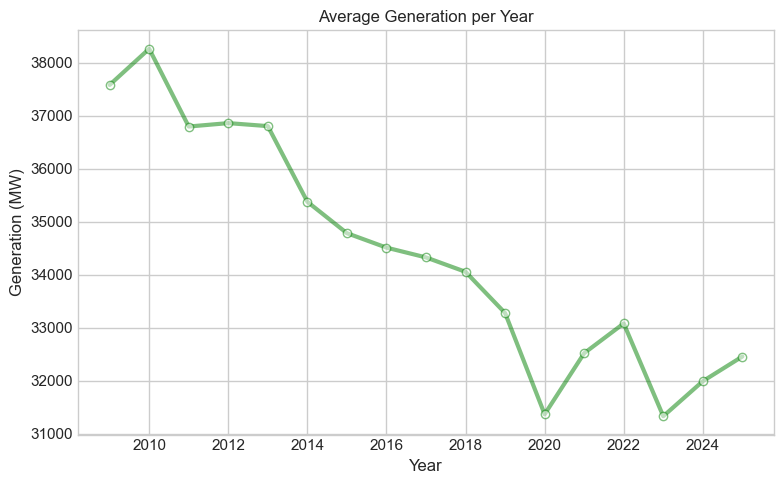

In [20]:
gen_yearly = df_carbon["GENERATION"].resample("y").mean()

plt.figure(figsize=(8, 5))
sns.lineplot(
    x=gen_yearly.index.year,
    y=gen_yearly.values,
    **base_style_renewable
)
plt.title("Average Generation per Year")
plt.xlabel("Year")
plt.ylabel("Generation (MW)")
plt.tight_layout()
plt.show()

# Storage smoothing behaviour

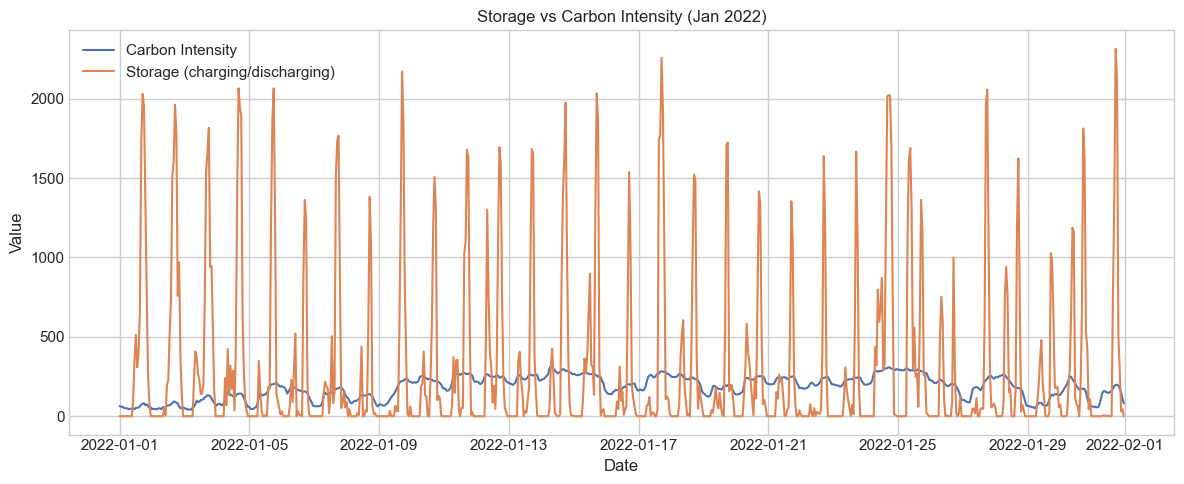

In [21]:
subset = df_carbon.loc["2022-01-01":"2022-01-31"].copy()

plt.figure(figsize=(12, 5))

sns.lineplot(
    data=subset,
    x=subset.index,
    y="CARBON_INTENSITY",
    label="Carbon Intensity",
)

sns.lineplot(
    data=subset,
    x=subset.index,
    y="STORAGE",
    label="Storage (charging/discharging)",
)

plt.title("Storage vs Carbon Intensity (Jan 2022)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Krist\AppData\Local\Temp\ipykernel_32856\2509163902.py:13: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Krist\anaconda3\envs\UKCarbonProject\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


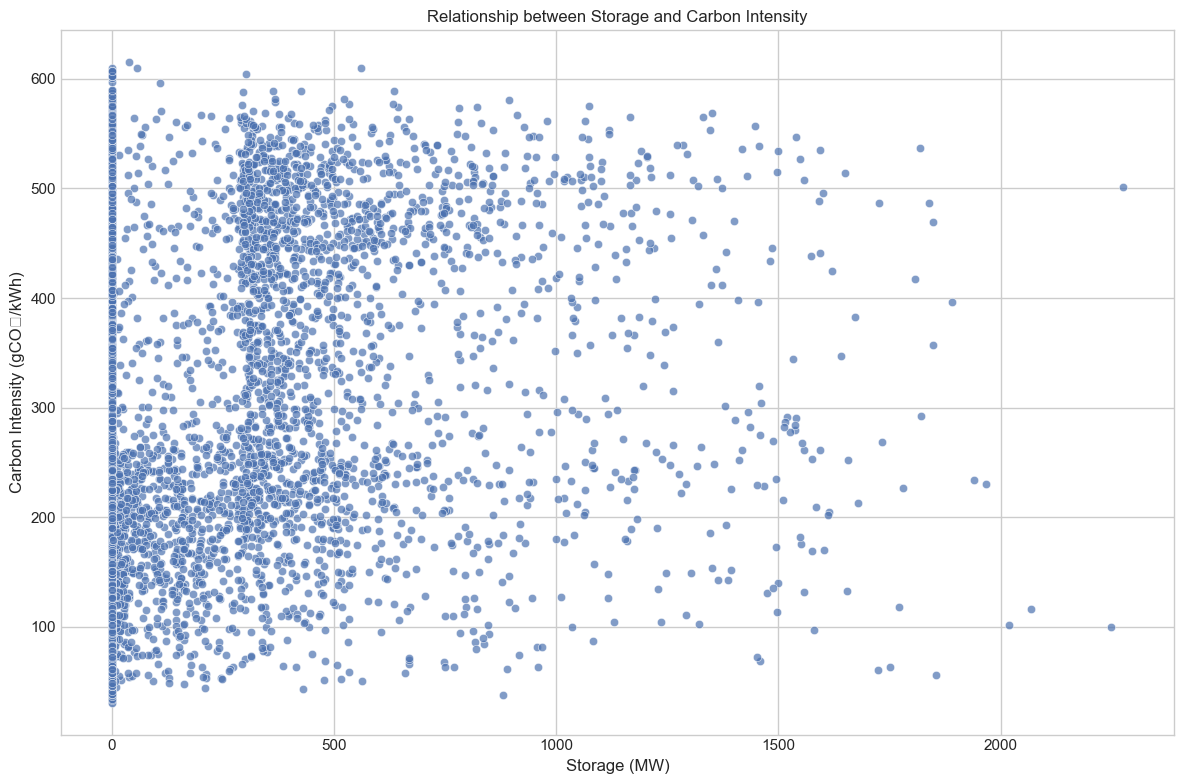

In [22]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_carbon.sample(5000),  # sample to avoid overplotting
    x="STORAGE",
    y="CARBON_INTENSITY",
    alpha=0.7,
)

plt.title("Relationship between Storage and Carbon Intensity")
plt.xlabel("Storage (MW)")
plt.ylabel("Carbon Intensity (gCO₂/kWh)")
plt.tight_layout()
plt.show()